In [60]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import os

input = []
for file in os.listdir("input"):
    excel_input = pd.read_excel("input/" + file, skiprows=4)
    excel_input.columns = [column.lower().replace("\n", "").replace(" ", "_").replace("-", "_").strip() for column in
                        excel_input.columns]
    input.append(excel_input)

input = pd.concat(input)

In [61]:
def get_district(district):
    if district == 1:
        return "Manhattan"
    elif district == 2:
        return "Bronx"
    elif district == 3:
        return "Brooklyn"
    elif district == 4:
        return "Queens"
    elif district == 5:
        return "Staten Island"


input.insert(1, "district", [get_district(x) for x in input.borough])

cur_sale = input[(input.total_units > 0) & (input.land_square_feet > 0)]
cur_sale['quantile'] = pd.qcut(cur_sale['sale_price'], 10, labels=False, duplicates='drop')
cur_sale = cur_sale[(cur_sale['quantile'] > 0) & (cur_sale['quantile'] < 10)].drop(
    columns="quantile")
cur_sale['year_quarter'] = cur_sale.sale_date.apply(lambda x: f"{x.year}-{x.quarter}")
cur_sale['price_per_lsf'] = cur_sale.sale_price / cur_sale.land_square_feet
cur_sale

/tmp/ipykernel_10554/4080256210.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_sale['quantile'] = pd.qcut(cur_sale['sale_price'], 10, labels=False, duplicates='drop')


,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,year_quarter,price_per_lsf
2,3,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,NaN,A9,8645 16TH AVENUE,...,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07,2022-1,425.170068
4,3,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,62,NaN,A9,44 BAY 13TH STREET,...,1.0,3575.0,2104.0,1901.0,1,A9,990000,2022-10-18,2022-4,276.923077
5,3,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,24,NaN,A9,8645 BAY 16 STREE,...,1.0,1571.0,1456.0,1935.0,1,A9,925000,2021-11-03,2021-4,588.796945
11,3,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6379,42,NaN,S1,2142 86TH STREET,...,2.0,1600.0,2640.0,1925.0,1,S1,2430000,2022-07-27,2022-3,1518.750000
12,3,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6398,39,NaN,A1,1638 BENSON AVENUE,...,1.0,3625.0,1825.0,1925.0,1,A1,1290000,2022-01-13,2022-1,355.862069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29493,4,Queens,WOODSIDE,30 WAREHOUSES,4,1210,50,NaN,E1,37-15 55TH STREET,...,1.0,2500.0,3500.0,1991.0,4,E1,1700000,2021-12-17,2021-4,680.000000
29494,4,Queens,WOODSIDE,30 WAREHOUSES,4,1321,12,NaN,E1,43-21 52ND STREET,...,1.0,7000.0,14000.0,1931.0,4,E1,9650000,2021-12-15,2021-4,1378.571429
29496,4,Queens,WOODSIDE,31 COMMERCIAL VACANT LAND,4,1321,16,NaN,E1,4315A 52ND STREET,...,1.0,15000.0,0.0,NaN,4,V1,9650000,2021-12-15,2021-4,643.333333
29498,4,Queens,WOODSIDE,37 RELIGIOUS FACILITIES,4,1308,46,NaN,M9,41-32 69TH STREET,...,2.0,1700.0,2400.0,1925.0,4,M9,1200000,2022-03-15,2022-1,705.882353


In [62]:

plot_h = cur_sale.drop(
    columns=["sale_date", "address", "zip_code", "block", "lot", "easement", "building_class_at_present",
             "residential_units", "commercial_units", "total_units", "year_built"])

quarter_year_sale_mean = plot_h.groupby(["year_quarter"]).mean()
quarter_year_sale_mean



/tmp/ipykernel_10554/529826121.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarter_year_sale_mean = plot_h.groupby(["year_quarter"]).mean()


,borough,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,sale_price,price_per_lsf
year_quarter,,,,,,
2021-4,3.483815,4827.239819,7686.329795,1.338322,3.378780e+06,722.277687
2022-1,3.551743,3884.684096,5793.159314,1.255719,2.662938e+06,603.799722
2022-2,3.527379,3869.079791,7024.794785,1.265841,2.425989e+06,615.254822
2022-3,3.542963,4178.787325,8616.911219,1.238938,1.972441e+06,587.563484
2022-4,3.432620,4584.310453,8371.572418,1.254408,2.133784e+06,607.871328


<AxesSubplot: xlabel='year_quarter'>

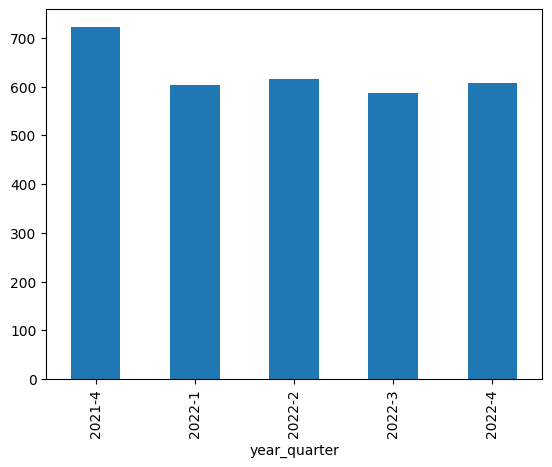

In [63]:
quarter_year_sale_mean.price_per_lsf.plot(kind="bar")

In [64]:
most_popular = plot_h.groupby(['district', 'year_quarter'], as_index=False).mean()
most_popular


/tmp/ipykernel_10554/1750084214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_popular = plot_h.groupby(['district', 'year_quarter'], as_index=False).mean()


,district,year_quarter,borough,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,sale_price,price_per_lsf
0,Bronx,2021-4,2.0,4549.527988,5176.826021,1.387292,1.738033e+06,333.577179
1,Bronx,2022-1,2.0,3701.722772,4254.667079,1.313119,1.401754e+06,336.661476
2,Bronx,2022-2,2.0,4264.555429,5742.456000,1.314286,1.845807e+06,373.829064
3,Bronx,2022-3,2.0,3630.651099,3932.517857,1.225275,1.518015e+06,414.739155
4,Bronx,2022-4,2.0,3454.512438,3028.517413,1.189055,1.077352e+06,311.768190
5,Brooklyn,2021-4,3.0,4938.593968,11190.529582,1.380510,3.107256e+06,760.729487
6,Brooklyn,2022-1,3.0,3226.381453,9423.525354,1.321608,1.940636e+06,690.665926
7,Brooklyn,2022-2,3.0,3590.824401,12114.303704,1.334205,2.788860e+06,787.383745
8,Brooklyn,2022-3,3.0,2924.108302,8876.405534,1.299618,2.268160e+06,805.548583
9,Brooklyn,2022-4,3.0,3456.995825,9822.070981,1.283925,2.340645e+06,736.836269


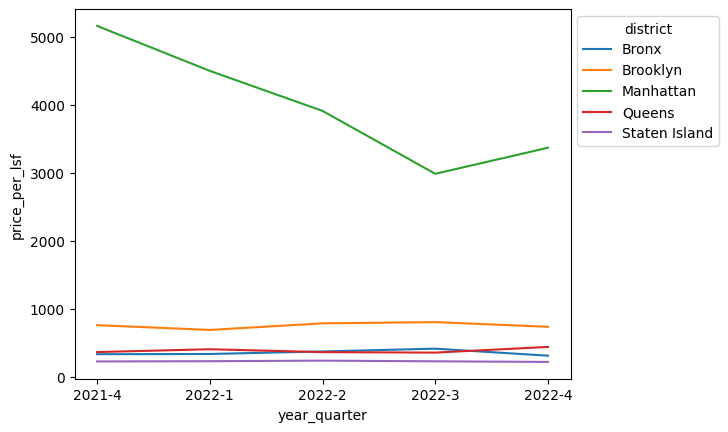

In [65]:
figure = plt.figure()
asix = figure.add_subplot(111)
asix = seaborn.lineplot(data=most_popular, x=most_popular.year_quarter, y=most_popular.price_per_lsf,
                      hue=most_popular.district)
seaborn.move_legend(asix, "upper left", bbox_to_anchor=(1, 1))